<a href="https://colab.research.google.com/github/areias/viral-escape/blob/main/FluBERTa_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Check GPU and RAM specifications

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Feb  1 09:16:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


## 2.  Load Flu dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install dependencies
! pip install anndata 

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 91 kB 2.3 MB/s 


In [ ]:
! pip install scanpy

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.0 MB 7.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 86 kB 6.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 49.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63 kB 2.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=e2845d52d5fa19ee3f1b946331d4b51a275abbdf2120b721196a486ced202c74
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=235e919556f7a037d9741964b7884dbc67965c1b68c57fccbed1dd3c5b2ee9d2
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581

In [ ]:
! pip install bio


     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 271 kB 6.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.3 MB 84.0 MB/s 


In [ ]:
AAs = [
        'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H',
        'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W',
        'Y', 'V', 'X', 'Z', 'J', 'U', 'B', 'Z'
    ]
    
vocabulary = { aa: idx + 1 for idx, aa in enumerate(sorted(AAs)) }



In [ ]:
import pickle 

In [ ]:
with open('drive/MyDrive/FluBERTa/train_seqs.pkl', 'rb') as handle:
   train_seqs = pickle.load(handle)

In [ ]:
with open('drive/MyDrive/FluBERTa/test_seqs.pkl', 'rb') as handle:
    test_seqs = pickle.load(handle)

In [ ]:
# Seals get the flu too!
test_seqs[list(test_seqs.keys())[0]]

[{'Collection Date': 1980,
  'Complete Genome': 'No',
  'Country': 'USA',
  'Flu Season': '-N/A-',
  'Host Species': 'sea mammal',
  'Name': 'HA',
  'Segment': '4',
  'Segment Length': '1730',
  'Sequence Accession': 'K00429',
  'State/Province': 'Massachusetts',
  'Strain Name': 'A/seal/Mass/1/1980',
  'Subtype': 'H7'}]

In [ ]:
len(train_seqs)

37368

## 3. Load RoBERTa model

In [ ]:
! pip install transformers

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.5 MB 6.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 63.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.8 MB 64.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 63.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67 kB 6.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
! pip install tokenizers

In [ ]:
# Check that PyTorch sees it
import torch
torch.cuda.is_available()

True

In [ ]:
from transformers import PreTrainedTokenizerFast

fast_tokenizer = PreTrainedTokenizerFast(tokenizer_file="drive/MyDrive/FluBERTa/tokenizer/tokenizer-flu.json",
                                         pad_token='<pad>',
                                         bos_token='<s>',
                                         eos_token='</s>',
                                         mask_token='<mask>',
                                         unk_token='<unk>',
                                         max_len=512,
                                         padding='max_length')


### Embeddings

>Model Output.Without adding any task-specific heads to thearchitecture, the model output is a list ofùëô=512vectors, each withlengthùëë=768. The first vector, which corresponds to the special[CLS]token, acts as an aggregate sequence representation whichwe use for sequence classification tasks. We refer to the entireoutput as the deep representation of the amino acid sequence.(https://dl.acm.org/doi/pdf/10.1145/3388440.3412467)

>We created protein embeddings by concatenatingthe vectors of each protein‚Äôs first 128 tokens and plotted the firsttwo principal components of thirty proteins from seven relatedprotein families (Figure 2). We concatenated the vectors becausethe concatenated vectors appeared to provide better visualizationresults than the [CLS] token

In [ ]:
# load model
from transformers import RobertaForMaskedLM

model = RobertaForMaskedLM.from_pretrained("drive/MyDrive/FluBERTa/checkpoint-11940")

In [ ]:
# get embeddings for each sequence
results=[]
i=0
for input in list(train_seqs.keys()):
    tokenized = fast_tokenizer(str(input), return_tensors='pt',truncation=True, max_length=128, pad_to_max_length=True)
    output = model(tokenized['input_ids'], output_hidden_states=True)
    reshaped = output[1][0].detach().numpy().reshape(-1)
    results.append(reshaped)
    i+=1
    if i%10==0:
        print(i)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [ ]:
import pandas as pd 
df=pd.DataFrame(results)

In [ ]:
labels=[]
for key in list(train_seqs.keys())[:100]:
    labels.append((train_seqs[key][0]['Subtype']))

In [ ]:
seq_umap = umap.UMAP(random_state=999, n_neighbors=30, min_dist=.25)

In [ ]:
embedding = pd.DataFrame(seq_umap.fit_transform(df), columns = ['UMAP1','UMAP2'])

In [ ]:
import seaborn as sns

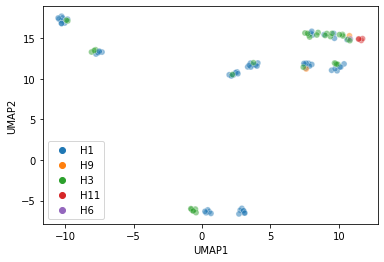

In [ ]:
sns_plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding,
                hue=labels, alpha=0.5)

In [ ]:
#logits (torch.FloatTensor of shape (batch_size, sequence_length, config.vocab_size)) ‚Äî 
#Prediction scores of the language modeling head (scores for each vocabulary token before SoftMax).
output=model(tokenized['input_ids'])
output

MaskedLMOutput([('logits',
                 tensor([[[  0.3284,  -2.5451,  -1.0574,  ...,   0.7105,   0.0706,   0.2751],
                          [  0.3801,  -2.6876,  -1.1999,  ...,   0.5664,   0.0676,   0.1666],
                          [ -4.1266, -14.9101, -10.4777,  ...,  -3.6559,  -4.5969,  -0.7188],
                          ...,
                          [ -1.4546,  -5.3512,  -4.5385,  ...,  -1.1332,  -1.3759,   0.1360],
                          [ -0.9589,  -5.4058,  -4.3840,  ...,  -1.4969,   0.1048,  -0.1053],
                          [ -1.1730,  -3.5750,  -2.9219,  ...,  -0.5292,  -0.4931,   0.5766]]],
                        grad_fn=<AddBackward0>))])

In [ ]:
output[0].shape

torch.Size([1, 512, 10000])

In [ ]:
# Hidden_states (tuple(torch.FloatTensor), optional, returned when output_hidden_states=True 
# is passed or when config.output_hidden_states=True) ‚Äî Tuple of torch.FloatTensor (one for the
# output of the embeddings + one for the output of each layer) of shape (batch_size, sequence_length, hidden_size).
# Hidden-states of the model at the output of each layer plus the initial embedding outputs.


# so output[0] is the logits, output[1] are the hidden states of which the first one is the embeddings output output[1][0]
output=model(tokenized['input_ids'], output_hidden_states=True)
output


MaskedLMOutput([('logits',
                 tensor([[[  0.3284,  -2.5451,  -1.0574,  ...,   0.7105,   0.0706,   0.2751],
                          [  0.3801,  -2.6876,  -1.1999,  ...,   0.5664,   0.0676,   0.1666],
                          [ -4.1266, -14.9101, -10.4777,  ...,  -3.6559,  -4.5969,  -0.7188],
                          ...,
                          [ -1.4546,  -5.3512,  -4.5385,  ...,  -1.1332,  -1.3759,   0.1360],
                          [ -0.9589,  -5.4058,  -4.3840,  ...,  -1.4969,   0.1048,  -0.1053],
                          [ -1.1730,  -3.5750,  -2.9219,  ...,  -0.5292,  -0.4931,   0.5766]]],
                        grad_fn=<AddBackward0>)),
                ('hidden_states',
                 (tensor([[[ 2.7688,  0.2373,  0.1323,  ..., -2.0113, -0.1106, -0.6160],
                           [-0.5216,  0.0647,  0.1816,  ..., -0.2783,  0.6556,  1.0091],
                           [ 1.2653, -0.0171,  1.3326,  ..., -0.1821,  1.1081,  0.2805],
                         

In [ ]:
output[1][0]

tensor([[[ 2.7688,  0.2373,  0.1323,  ..., -2.0113, -0.1106, -0.6160],
         [-0.5216,  0.0647,  0.1816,  ..., -0.2783,  0.6556,  1.0091],
         [ 1.2653, -0.0171,  1.3326,  ..., -0.1821,  1.1081,  0.2805],
         ...,
         [ 1.1261,  0.2216, -0.8493,  ...,  0.0396, -0.4087,  0.5506],
         [ 1.9634,  0.3149, -1.6544,  ...,  0.7884,  0.1754,  0.0401],
         [ 0.8533,  0.0817, -0.1217,  ...,  0.5529,  0.3056, -0.5172]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
output[1][0].shape

torch.Size([1, 512, 768])

In [ ]:
input2=str(list(train_seqs.keys())[1])
input2

'MKAILVVLLYTFATANADTLCIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDKHNGKLCKLRGVAPLHLGKCNIAGWILGNPECESLSTASSWSYIVETSSSDNGTCYPGDFIDYEELREQLSSVSSFERFEIFPKTSSWPNHDSNKGVTAACPHAGAKSFYKNLIWLVKKGNSYPKLSKSYINDKGKEVLVLWGIHHPSTSADQQSLYQNADAYVFVGTSRYSKKFKPEIAIRPKVRDQEGRMNYYWTLVEPGDKITFEATGNLVVPRYAFAMERNAGSGIIISDTPVHDCNTTCQTPKGAINTSLPFQNIHPITIGNCPKYVKSTKLRLATGLRNVPSIQSRGLFGAIAGFIEGGWTGMVDGWYGYHHQNEQGSGYAADLKSTQNAIDKITNKVNSVIEKMNTQFTAVGKEFNHLEKRIENLNKKVDDGFLDIWTYNAELLVLLENERTLDYHDSNVKNLYEKVRSQLKNNAKEIGNGCFEFYHKCDNTCMESVKNGTYDYPKYSEEAKLNREEIDGVKLESTRIYQILAIYSTVASSLVLIVSLGAISFWMCSNGSLQCRICI'

In [ ]:
tokenized2=fast_tokenizer(input2, return_tensors='pt',truncation=True, max_length=512, pad_to_max_length=True)
tokenized2

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


{'input_ids': tensor([[   0, 8092,  663, 4708,  582, 6278, 7668, 3523, 6674, 2603, 9819,   79,
            1,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
            2,

In [ ]:
output2=model(tokenized2['input_ids'], output_hidden_states=True)
output2[1][0].shape

torch.Size([1, 512, 768])

In [ ]:
output2[1][0]

tensor([[[ 2.7688,  0.2373,  0.1323,  ..., -2.0113, -0.1106, -0.6160],
         [-0.3416, -0.9324, -1.5496,  ..., -1.0684,  0.3393, -0.3023],
         [ 1.8735,  0.6589,  1.1499,  ..., -0.5557,  1.2416, -0.3284],
         ...,
         [ 1.1261,  0.2216, -0.8493,  ...,  0.0396, -0.4087,  0.5506],
         [ 1.9634,  0.3149, -1.6544,  ...,  0.7884,  0.1754,  0.0401],
         [ 0.8533,  0.0817, -0.1217,  ...,  0.5529,  0.3056, -0.5172]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
import tensorflow as tf

In [ ]:
tf.reshape(output2[1][0].detach().numpy(),-1)

<tf.Tensor: shape=(393216,), dtype=float32, numpy=
array([ 2.7688148 ,  0.23727259,  0.13234113, ...,  0.5529293 ,
        0.3056176 , -0.51720893], dtype=float32)>

In [ ]:
! pip install umap-learn

In [ ]:
import umap

In [ ]:
seq_umap = umap.UMAP(random_state=999, n_neighbors=3, min_dist=.25)

In [ ]:
umap_embeddings = pd.DataFrame(brain_umap.fit_transform(matrix), columns = ['UMAP1','UMAP2'])

## 4. Results

### 4.1. Influenza HA semantic embedding UMAPs and statistics 


> ... to understand the semantic patterns learned by our viral language models ... We therefore visualized the semantic
embeddings of each sequence in the influenza, HIV, and coronavirus corpuses using Uniform Manifold Approximation and Projection (UMAP) (13). The resulting two-dimensional semantic landscapes show clustering patterns that correspond to subtype, host species, or both (Fig. 2), suggesting that the model was able to learn functionally meaningful patterns from raw sequence.


Our model trained on only 1,000 sequences for 3 epochs achieves relatively good clustering results as can be visualized by the [graphs](#cell-id) and the following cluster purity statistics:

* Purity, Louvain and subtype: 0.699
* Purity, Louvain and host species: 0.896

For comparison, the full model achieves average cluster purities for HA subtype and HA host species of 99, 96%, respectively.


Of course the embeddings obtained from the full model encode a lot more information when you compare our UMAP graphs with the full model graphs that show a much more disperse landscape.

<insert original graph here>




In [ ]:
! python viral-mutation/bin/flu.py bilstm --checkpoint drive/MyDrive/target/flu/checkpoints/bilstm/bilstm_512-03.hdf5 --embed > flu_embed.log 2>&1

/bin/bash: line 1:   753 Killed                  python viral-mutation/bin/flu.py bilstm --checkpoint drive/MyDrive/target/flu/checkpoints/bilstm/bilstm_512-03.hdf5 --embed > flu_embed.log 2>&1


In [ ]:
# from bin/flu.py
analyze_embedding(args, model, seqs, vocabulary)


In [ ]:
from collections import namedtuple
arguments = namedtuple('arguments', ['model_name',
                                     'dim','n_epochs','batch_size',
                                     'namespace','seed','checkpoint'])

args = arguments('bilstm',512,3,350, # defaults were batch-size 1000, 14 epochs
                 'flu',1, "drive/MyDrive/target/flu/checkpoints/bilstm/bilstm_512-03.hdf5")
args

arguments(model_name='bilstm', dim=512, n_epochs=3, batch_size=350, namespace='flu', seed=1, checkpoint='drive/MyDrive/target/flu/checkpoints/bilstm/bilstm_512-03.hdf5')

In [ ]:
# from bin/flu.py
from flu import *


In [ ]:
fnames = [ 'data/influenza/ird_influenzaA_HA_allspecies.fa' ]
meta_fnames = [ 'data/influenza/ird_influenzaA_HA_allspecies_meta.tsv' ]

seqs = process(fnames, meta_fnames)


In [ ]:
from collections import defaultdict 

seqs_subset= defaultdict(dict)

for x in list(seqs)[0:1000]:
    seqs_subset[x] = seqs[x]


In [ ]:
seq_len = max([ len(seq) for seq in seqs_subset ]) + 2
vocab_size = len(AAs) + 2


In [ ]:
#from keras.models import load_model
#model = load_model('drive/MyDrive/target/flu/checkpoints/bilstm/bilstm_512-03.hdf5')


from language_model import BiLSTMLanguageModel
model = BiLSTMLanguageModel(
    seq_len,
    vocab_size,
    embedding_dim=20,
    hidden_dim=args.dim,
    n_hidden=2,
    n_epochs=args.n_epochs,
    batch_size=args.batch_size,
    inference_batch_size=350,
    seed=args.seed,
    verbose=True,
)



In [ ]:
model.model_.load_weights(args.checkpoint)
tprint('Model summary:')
tprint(model.model_.summary())


2022-01-04 16:34:45.462981 | Model summary:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 569)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 569)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 569, 20)      580         ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 569, 512)  

In [ ]:
! pip install igraph

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.2 MB 8.1 MB/s 


In [ ]:
! pip install louvain

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 7.3 MB/s 


In [ ]:
import importlib

In [ ]:

importlib.reload(sys.modules['flu'])
from flu import *

In [ ]:
!mkdir target/flu/clusters

<a name="cell-id"></a>
#### UMAP graphs 



... storing 'Name' as categorical
... storing 'Complete Genome' as categorical
... storing 'Segment' as categorical
... storing 'Segment Length' as categorical
... storing 'Subtype' as categorical
... storing 'Host Species' as categorical
... storing 'Country' as categorical
... storing 'State/Province' as categorical
... storing 'Flu Season' as categorical
... storing 'Strain Name' as categorical


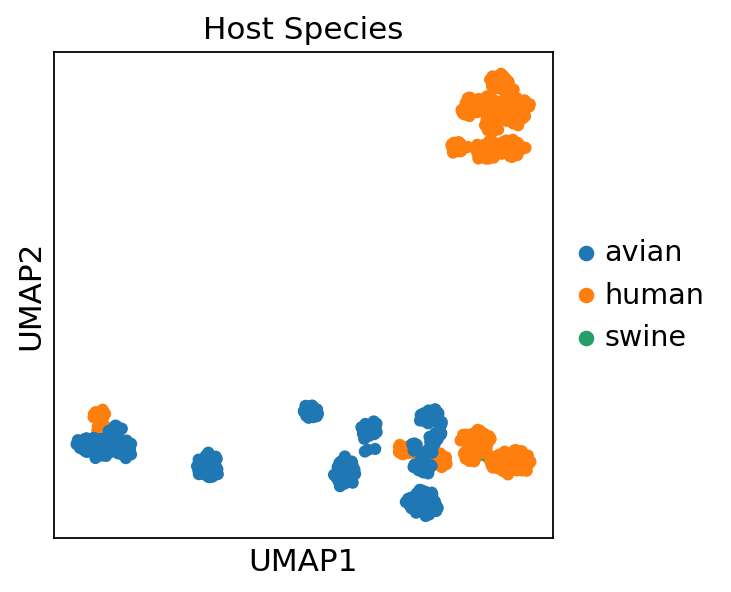

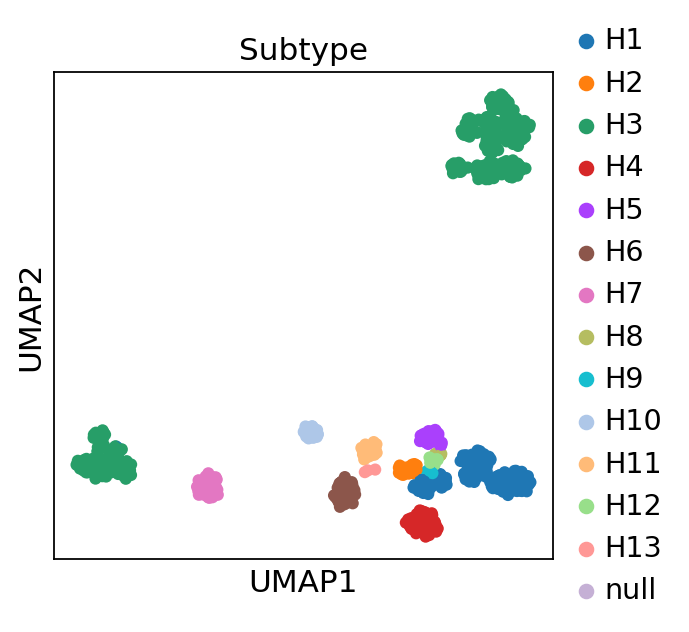

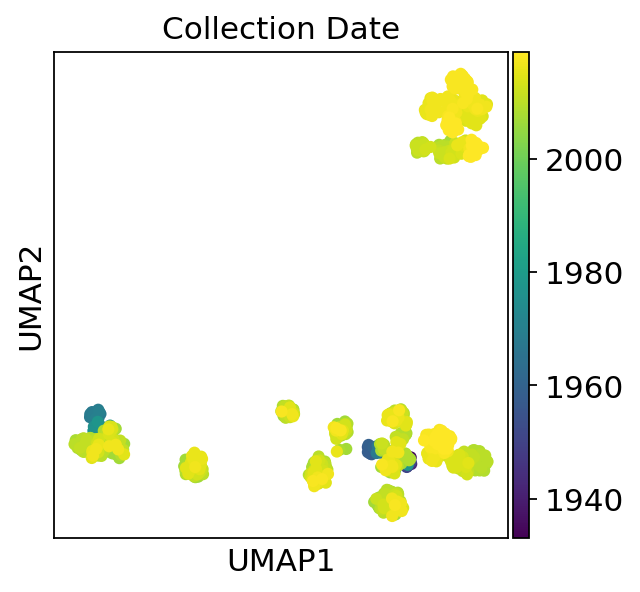

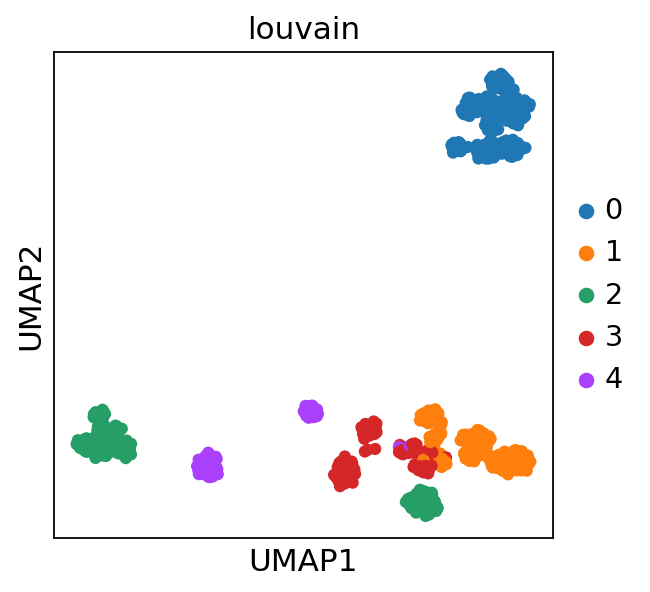

2022-01-04 15:47:55.696858 | Cluster 0
2022-01-04 15:47:55.714900 | 	Collection Date:
2022-01-04 15:47:55.715841 | 		2017: 55
2022-01-04 15:47:55.716675 | 		2015: 48
2022-01-04 15:47:55.717674 | 		2018: 42
2022-01-04 15:47:55.718793 | 		2019: 35
2022-01-04 15:47:55.719917 | 		2016: 31
2022-01-04 15:47:55.720817 | 		2014: 28
2022-01-04 15:47:55.721699 | 		2012: 20
2022-01-04 15:47:55.722947 | 		2010: 13
2022-01-04 15:47:55.724258 | 		2013: 9
2022-01-04 15:47:55.725249 | 		2011: 6
2022-01-04 15:47:55.726345 | 		2007: 4
2022-01-04 15:47:55.727531 | 		2008: 3
2022-01-04 15:47:55.728743 | 		2009: 1
2022-01-04 15:47:55.729832 | 		1978: 1
2022-01-04 15:47:55.731109 | 	Country:
2022-01-04 15:47:55.732583 | 		USA: 255
2022-01-04 15:47:55.733643 | 		Canada: 26
2022-01-04 15:47:55.734643 | 		Iran: 5
2022-01-04 15:47:55.736010 | 		Brazil: 3
2022-01-04 15:47:55.737117 | 		Peru: 2
2022-01-04 15:47:55.738167 | 		Australia: 2
2022-01-04 15:47:55.739555 | 		Switzerland: 2
2022-01-04 15:47:55.740593 | 	

In [ ]:
# commented out umap 1918 flu since I think there are no observation in my subset
analyze_embedding(args, model, seqs_subset, vocabulary)



###  4.2. Single-residue escape prediction using validation data from Doud et al. (2018) and Lee et al. (2019) 

> ... we then tested whether combining seman-
tic change and grammaticality enables us to
predict mutations that lead to viral escape.
Our experimental setup involved making, in
silico, all possible single-residue mutations
to a given viral protein sequence; next, each
mutant was ranked according to the CSCS
objective that combines semantic change and
grammaticality. We validated this ranking on
the basis of enrichment of experimentally verified mutants that causally induce escape from
neutralizing antibodies. 

> We computed the area under the curve
(AUC) of acquired escape mutations versus the
total acquired mutations (12). ... escape prediction with CSCS resulted in **both statistically significant and strong AUCs of
0.81, 0.73 for H1 WSN33 and H3 Perth09.**


In comparison, our 1,000 sequences model for H1 WSN33 results in AUC of 
* AUC (CSCS): 0.6943165566179895, P = 0.0
* AUC (semantic change only): 0.5365467547056084
* AUC (grammaticality only): 0.7185742075125345

I still have yet to run the code for H3 Perth09.




The validation data consists of:
* Escape single-residue DMS of HA H1 WSN33 from Doud et al.
(2018); 
* Escape single-residue DMS of HA H3 Perth09 from
Lee et al. (2019)


In [ ]:
# add to to path
import sys
sys.path.append('viral-mutation/bin')

In [ ]:
# load vocabulary
AAs = [
        'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H',
        'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W',
        'Y', 'V', 'X', 'Z', 'J', 'U', 'B', 'Z'
    ]
    
vocabulary = { aa: idx + 1 for idx, aa in enumerate(sorted(AAs)) }



In [ ]:
# load args
from collections import namedtuple
arguments = namedtuple('arguments', ['model_name','namespace','checkpoint',
                                      'dim','n_epochs','batch_size','seed'])

args = arguments('bilstm', 'flu', 'drive/MyDrive/target/flu/checkpoints/bilstm/bilstm_512-03.hdf5',
                 512,3,350,1)
args

arguments(model_name='bilstm', namespace='flu', checkpoint='drive/MyDrive/target/flu/checkpoints/bilstm/bilstm_512-03.hdf5', dim=512, n_epochs=3, batch_size=350, seed=1)

In [ ]:
# load model
from flu import * 

fnames = [ 'data/influenza/ird_influenzaA_HA_allspecies.fa' ]
meta_fnames = [ 'data/influenza/ird_influenzaA_HA_allspecies_meta.tsv' ]

seqs = process(fnames, meta_fnames)

from collections import defaultdict 

seqs_subset= defaultdict(dict)

for x in list(seqs)[0:1000]:
    seqs_subset[x] = seqs[x]

seq_len = max([ len(seq) for seq in seqs_subset ]) + 2
vocab_size = len(AAs) + 2

from language_model import BiLSTMLanguageModel
model = BiLSTMLanguageModel(
    seq_len,
    vocab_size,
    embedding_dim=20,
    hidden_dim=args.dim,
    n_hidden=2,
    n_epochs=args.n_epochs,
    batch_size=args.batch_size,
    inference_batch_size=350,
    seed=args.seed,
    verbose=True,
)
model.model_.load_weights(args.checkpoint)


In [ ]:
# from flu.py

from escape import load_doud2018, load_lee2019

tprint('Lee et al. 2018...')
seq_to_mutate, escape_seqs = load_doud2018()

"""
analyze_semantics(args, model, vocabulary, seq_to_mutate, escape_seqs,
                    prob_cutoff=0., beta=1., plot_acquisition=True,
                    plot_namespace='flu_h1')
tprint('')

tprint('Lee et al. 2019...')
seq_to_mutate, escape_seqs = load_lee2019()
analyze_semantics(args, model, vocabulary, seq_to_mutate, escape_seqs,
                    prob_cutoff=0., beta=1., plot_acquisition=True,
                    plot_namespace='flu_h3')
"""

2022-01-04 17:44:41.871110 | Lee et al. 2018...


"\nanalyze_semantics(args, model, vocabulary, seq_to_mutate, escape_seqs,\n                    prob_cutoff=0., beta=1., plot_acquisition=True,\n                    plot_namespace='flu_h1')\ntprint('')\n\ntprint('Lee et al. 2019...')\nseq_to_mutate, escape_seqs = load_lee2019()\nanalyze_semantics(args, model, vocabulary, seq_to_mutate, escape_seqs,\n                    prob_cutoff=0., beta=1., plot_acquisition=True,\n                    plot_namespace='flu_h3')\n"

In [ ]:
len(seq_to_mutate)

565

In [ ]:
len(escape_seqs)

10736

In [ ]:
y_pred = predict_sequence_prob(
    args, seq_to_mutate, vocabulary, model, verbose=True)

In [ ]:
y_pred

array([[1.07561533e-08, 1.31496345e-05, 1.57059489e-07, ...,
        9.99410868e-01, 2.38247725e-12, 8.42569392e-09],
       [3.64688990e-09, 3.87536420e-06, 1.95696600e-07, ...,
        3.02035223e-05, 8.40067078e-12, 4.15505630e-09],
       [6.08486152e-06, 9.61071532e-03, 1.47017636e-04, ...,
        1.86240271e-04, 3.31790403e-07, 1.16440306e-05],
       ...,
       [1.49749735e-09, 2.34280506e-09, 4.94858732e-09, ...,
        1.41904240e-11, 6.38366089e-07, 7.48250129e-10],
       [1.90206695e-08, 2.29081056e-08, 1.98895208e-07, ...,
        6.88880966e-11, 8.39728891e-05, 1.31131577e-08],
       [4.49544013e-10, 5.12200171e-10, 2.01064365e-09, ...,
        3.49836566e-12, 9.99730885e-01, 4.19264179e-10]], dtype=float32)

In [ ]:
min_pos=None
max_pos=None

if min_pos is None:
    min_pos = 0
if max_pos is None:
    max_pos = len(seq_to_mutate) - 1


In [ ]:
word_pos_prob = {}
for i in range(min_pos, max_pos + 1):
    for word in vocabulary:
        if seq_to_mutate[i] == word:
            continue
        word_idx = vocabulary[word]
        prob = y_pred[i + 1, word_idx]
        word_pos_prob[(word, i)] = prob


In [ ]:
word_pos_prob

{('A', 0): 3.875364e-06,
 ('B', 0): 1.956966e-07,
 ('C', 0): 3.6517363e-08,
 ('D', 0): 5.911854e-07,
 ('E', 0): 1.7865657e-06,
 ('F', 0): 8.303466e-06,
 ('G', 0): 3.026172e-08,
 ('H', 0): 2.1746813e-09,
 ('I', 0): 0.00011714283,
 ('J', 0): 2.8908774e-08,
 ('K', 0): 2.0078021e-05,
 ('L', 0): 1.3311374e-05,
 ('N', 0): 2.1229867e-05,
 ('P', 0): 2.7974133e-07,
 ('Q', 0): 5.1960278e-08,
 ('R', 0): 3.1007568e-07,
 ('S', 0): 1.2698209e-06,
 ('T', 0): 4.259255e-06,
 ('U', 0): 2.6073836e-09,
 ('V', 0): 1.6788523e-05,
 ('W', 0): 4.272273e-10,
 ('X', 0): 1.8418419e-06,
 ('Y', 0): 7.413977e-06,
 ('Z', 0): 3.0203522e-05,
 ('A', 1): 0.009610715,
 ('B', 1): 0.00014701764,
 ('C', 1): 0.00056215614,
 ('D', 1): 4.8274673e-05,
 ('E', 1): 0.06468596,
 ('F', 1): 0.000504288,
 ('G', 1): 0.00037320412,
 ('H', 1): 2.0290881e-05,
 ('I', 1): 0.024884174,
 ('J', 1): 1.5636513e-05,
 ('L', 1): 0.0029563191,
 ('M', 1): 0.00754108,
 ('N', 1): 0.46458787,
 ('P', 1): 0.00029706865,
 ('Q', 1): 0.00031260384,
 ('R', 1):

In [ ]:
prob_cutoff=0.
prob_seqs = { seq_to_mutate: [ { 'word': None, 'pos': None } ] }
seq_prob = {}
for (word, pos), prob in word_pos_prob.items():
    mutable = seq_to_mutate[:pos] + word + seq_to_mutate[pos + 1:]
    seq_prob[mutable] = prob
    if prob >= prob_cutoff:
        prob_seqs[mutable] = [ { 'word': word, 'pos': pos } ]



In [ ]:
seq_prob

{Seq('AKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 3.875364e-06,
 Seq('BKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 1.956966e-07,
 Seq('CKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 3.6517363e-08,
 Seq('DKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 5.911854e-07,
 Seq('EKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 1.7865657e-06,
 Seq('FKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 8.303466e-06,
 Seq('GKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 3.026172e-08,
 Seq('HKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 2.1746813e-09,
 Seq('IKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 0.00011714283,
 Seq('JKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 2.8908774e-08,
 Seq('KKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 2.0078021e-05,
 Seq('LKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHSVNLLEDSH...ICI'): 

In [ ]:
seqs = np.array([ str(seq) for seq in sorted(seq_prob.keys()) ])


In [ ]:
plot_acquisition=True
plot_namespace=None
if plot_acquisition:
    dirname = ('target/{}/semantics/cache'.format(args.namespace))
    mkdir_p(dirname)
    if plot_namespace is None:
        plot_namespace = args.namespace
            

In [ ]:

if plot_acquisition:
    ofname = dirname + '/{}_mutations.txt'.format(args.namespace)
    with open(ofname, 'w') as of:
        of.write('orig\tmutant\n')
        for seq in seqs:
            try:
                didx = [
                    c1 != c2 for c1, c2 in zip(seq_to_mutate, seq)
                ].index(True)
                of.write('{}\t{}\t{}\n'
                            .format(didx, seq_to_mutate[didx], seq[didx]))
            except ValueError:
                of.write('NA\n')


In [ ]:
base_embedding = embed_seqs(
        args, model, { seq_to_mutate: [ {} ] }, vocabulary,
        use_cache=False, verbose=False)[seq_to_mutate][0]['embedding']

In [ ]:
base_embedding

array([[-4.0877503e-03,  4.7385404e-03,  3.0578572e-01, ...,
         4.9899460e-04,  1.4398832e-04,  2.9687178e-03],
       [-4.7924751e-04,  9.3112671e-01,  2.4223092e-03, ...,
         2.6737031e-05,  3.4821354e-02,  1.7785745e-02],
       [-6.6967487e-02,  2.5158264e-03,  2.0699388e-04, ...,
         8.1472169e-04,  3.6051399e-03,  3.7035710e-01],
       ...,
       [-9.8514205e-01,  1.4412265e-04,  7.4834831e-04, ...,
         7.4405987e-05,  3.4992717e-04,  9.6718976e-03],
       [-8.3217956e-02,  8.7168109e-01,  3.0630312e-05, ...,
         3.3770809e-06,  2.7610385e-04,  1.9304555e-02],
       [-5.2681714e-01,  1.5569000e-05,  5.4204129e-03, ...,
         4.6851624e-06,  2.4655293e-04,  9.4835516e-03]], dtype=float32)

In [ ]:
len(seqs)

13560

In [ ]:
# increasing number of batches
comb_batch=2500
if comb_batch is None:
    comb_batch = len(seqs)
n_batches = math.ceil(float(len(seqs)) / comb_batch)
n_batches

6

In [ ]:
seq_change = {}
for batchi in range(n_batches):
    start = batchi * comb_batch
    end = (batchi + 1) * comb_batch
    prob_seqs_batch = {
        seq: deepcopy(prob_seqs[seq]) for seq in seqs[start:end]
        if seq != seq_to_mutate
    }
    prob_seqs_batch = embed_seqs(
        args, model, prob_seqs_batch, vocabulary,
        use_cache=False, verbose=True
    )
    for mut_seq in prob_seqs_batch:
        meta = prob_seqs_batch[mut_seq][0]
        sem_change = abs(base_embedding - meta['embedding']).sum()
        seq_change[mut_seq] = sem_change
    del prob_seqs_batch

    print(batchi)

2022-01-04 17:45:37.124601 | Embedding...
4050/4050 [==============================] - 2279s 563ms/step
2022-01-04 18:24:22.854917 | Done embedding.
0
2022-01-04 18:24:43.953275 | Embedding...
4050/4050 [==============================] - 2282s 563ms/step
2022-01-04 19:03:21.418442 | Done embedding.
1
2022-01-04 19:03:45.062393 | Embedding...
4050/4050 [==============================] - 2284s 564ms/step
2022-01-04 19:42:38.488916 | Done embedding.
2
2022-01-04 19:43:02.191427 | Embedding...
4050/4050 [==============================] - 2285s 564ms/step
2022-01-04 20:21:38.120591 | Done embedding.
3
2022-01-04 20:22:04.175847 | Embedding...
4050/4050 [==============================] - 2284s 564ms/step
2022-01-04 21:00:43.935656 | Done embedding.
4
2022-01-04 21:01:00.736440 | Embedding...
1718/1718 [==============================] - 967s 563ms/step
2022-01-04 21:17:18.485657 | Done embedding.
5


In [ ]:
cache_fname = dirname + (
    '/analyze_semantics_{}_{}_{}.txt'
    .format(plot_namespace, args.model_name, args.dim)
)

In [ ]:
probs, changes = [], []
with open(cache_fname, 'w') as of:
    fields = [ 'pos', 'wt', 'mut', 'prob', 'change',
                'is_viable', 'is_escape' ]
    of.write('\t'.join(fields) + '\n')
    for seq in seqs:
        prob = seq_prob[seq]
        change = seq_change[seq]
        mut = prob_seqs[seq][0]['word']
        pos = prob_seqs[seq][0]['pos']
        orig = seq_to_mutate[pos]
        is_viable = seq in escape_seqs
        is_escape = ((seq in escape_seqs) and
                        (sum([ m['significant']
                            for m in escape_seqs[seq] ]) > 0))
        fields = [ pos, orig, mut, prob, change, is_viable, is_escape ]
        of.write('\t'.join([ str(field) for field in fields ]) + '\n')
        probs.append(prob)
        changes.append(change)


In [ ]:
beta=1.
if plot_acquisition:
    from cached_semantics import cached_escape



In [ ]:
cache_fname

'target/flu/semantics/cache/analyze_semantics_flu_bilstm_512.txt'

In [ ]:
if plot_acquisition:
    from cached_semantics import cached_escape
    cached_escape(cache_fname, beta,
                plot=plot_acquisition,
                namespace=plot_namespace)

In [ ]:
# from cached_semantics.py
prob_cutoff=0.
beta=1.
plot_acquisition=True,
plot_namespace='flu_h1'
cutoff=None

from escape import load_doud2018
if cutoff is None:
    wt_seq, seqs_escape = load_doud2018()


In [ ]:
prob, change, escape_idx, viable_idx = [], [], [], []
with open(cache_fname) as f:
    f.readline()
    for line in f:
        fields = line.rstrip().split('\t')
        pos = int(fields[0])
        if 'rbd' in cache_fname:
            if pos < 330 or pos > 530:
                continue
        if fields[2] in { 'U', 'B', 'J', 'X', 'Z' }:
            continue
        aa_wt = fields[1]
        aa_mut = fields[2]
        assert(wt_seq[pos] == aa_wt)
        mut_seq = wt_seq[:pos] + aa_mut + wt_seq[pos+1:]
        if mut_seq not in seqs_escape:
            continue
        prob.append(float(fields[3]))
        change.append(float(fields[4]))
        viable_idx.append(fields[5] == 'True')
        escape_idx.append(
            (mut_seq in seqs_escape) and
            (sum([ m['significant']
                    for m in seqs_escape[mut_seq] ]) > 0)
        )

In [ ]:
from sklearn.metrics import auc
from cached_semantics import compute_p

prob, orig_prob = np.array(prob), np.array(prob)
change, orig_change  = np.array(change), np.array(change)
escape_idx = np.array(escape_idx)
viable_idx = np.array(viable_idx)

acquisition = ss.rankdata(change) + (beta * ss.rankdata(prob))

pos_change_idx = change > 0

pos_change_escape_idx = np.logical_and(pos_change_idx, escape_idx)
escape_prob = prob[pos_change_escape_idx]
escape_change = change[pos_change_escape_idx]
prob = prob[pos_change_idx]
change = change[pos_change_idx]

log_prob, log_change = np.log10(prob), np.log10(change)
log_escape_prob, log_escape_change = (np.log10(escape_prob),
                                        np.log10(escape_change))

plot=True
namespace='flu_h1'
if plot:
    mkdir_p('figures')

    plt.figure()
    plt.scatter(log_prob, log_change, c=acquisition[pos_change_idx],
                cmap='viridis', alpha=0.3)
    plt.scatter(log_escape_prob, log_escape_change, c='red',
                alpha=0.5, marker='x')
    plt.xlabel(r'$ \log_{10}(\hat{p}(x_i | \mathbf{x}_{[N] ‚àñ \{i\} })) $')
    plt.ylabel(r'$ \log_{10}(\Delta \mathbf{\hat{z}}) $')
    plt.savefig('figures/{}_acquisition.png'
                .format(namespace), dpi=300)
    plt.close()

    rand_idx = np.random.choice(len(prob), len(escape_prob))
    plt.figure()
    plt.scatter(log_prob, log_change, c=acquisition[pos_change_idx],
                cmap='viridis', alpha=0.3)
    plt.scatter(log_prob[rand_idx], log_change[rand_idx], c='red',
                alpha=0.5, marker='x')
    plt.xlabel(r'$ \log_{10}(\hat{p}(x_i | \mathbf{x}_{[N] ‚àñ \{i\} })) $')
    plt.ylabel(r'$ \log_{10}(\Delta \mathbf{\hat{z}}) $')
    plt.savefig('figures/{}_acquisition_rand.png'
                .format(namespace), dpi=300)
    plt.close()

if len(escape_prob) == 0:
    print('No escape mutations found.')
    #return

acq_argsort = ss.rankdata(-acquisition)
escape_rank_dist = acq_argsort[escape_idx]

size = len(prob)
print('Number of escape seqs: {} / {}'
        .format(len(escape_rank_dist), sum(escape_idx)))
print('Mean rank: {} / {}'.format(np.mean(escape_rank_dist), size))
print('Median rank: {} / {}'.format(np.median(escape_rank_dist), size))
print('Min rank: {} / {}'.format(np.min(escape_rank_dist), size))
print('Max rank: {} / {}'.format(np.max(escape_rank_dist), size))
print('Rank stdev: {} / {}'.format(np.std(escape_rank_dist), size))

max_consider = len(prob)
n_consider = np.array([ i + 1 for i in range(max_consider) ])

n_escape = np.array([ sum(escape_rank_dist <= i + 1)
                        for i in range(max_consider) ])
norm = max(n_consider) * max(n_escape)
norm_auc = auc(n_consider, n_escape) / norm

escape_rank_prob = ss.rankdata(-orig_prob)[escape_idx]
n_escape_prob = np.array([ sum(escape_rank_prob <= i + 1)
                            for i in range(max_consider) ])
norm_auc_prob = auc(n_consider, n_escape_prob) / norm

escape_rank_change = ss.rankdata(-orig_change)[escape_idx]
n_escape_change = np.array([ sum(escape_rank_change <= i + 1)
                                for i in range(max_consider) ])
norm_auc_change = auc(n_consider, n_escape_change) / norm

if plot:
    plt.figure()
    plt.plot(n_consider, n_escape)
    plt.plot(n_consider, n_escape_change, c='C0', linestyle='-.')
    plt.plot(n_consider, n_escape_prob, c='C0', linestyle=':')
    plt.plot(n_consider, n_consider * (len(escape_prob) / len(prob)),
                c='gray', linestyle='--')

    plt.xlabel(r'$ \log_{10}() $')
    plt.ylabel(r'$ \log_{10}(\Delta \mathbf{\hat{z}}) $')

    plt.legend([
        r'$ \Delta \mathbf{\hat{z}} + ' +
        r'\beta \hat{p}(x_i | \mathbf{x}_{[N] ‚àñ \{i\} }) $,' +
        (' AUC = {:.3f}'.format(norm_auc)),
        r'$  \Delta \mathbf{\hat{z}} $ only,' +
        (' AUC = {:.3f}'.format(norm_auc_change)),
        r'$ \hat{p}(x_i | \mathbf{x}_{[N] ‚àñ \{i\} }) $ only,' +
        (' AUC = {:.3f}'.format(norm_auc_prob)),
        'Random guessing, AUC = 0.500'
    ])
    plt.xlabel('Top N')
    plt.ylabel('Number of escape mutations in top N')
    plt.savefig('figures/{}_consider_escape.png'
                .format(namespace), dpi=300)
    plt.close()


print('Escape semantics, beta = {} [{}]'
        .format(beta, namespace))

norm_auc_p = compute_p(norm_auc, sum(escape_idx), len(escape_idx))

print('AUC (CSCS): {}, P = {}'.format(norm_auc, norm_auc_p))
print('AUC (semantic change only): {}'.format(norm_auc_change))
print('AUC (grammaticality only): {}'.format(norm_auc_prob))

print('{:.4g} (mean log prob), {:.4g} (mean log prob escape), '
        '{:.4g} (p-value)'
        .format(log_prob.mean(), log_escape_prob.mean(),
                ss.mannwhitneyu(log_prob, log_escape_prob,
                                alternative='two-sided')[1]))
print('{:.4g} (mean log change), {:.4g} (mean log change escape), '
        '{:.4g} (p-value)'
        .format(change.mean(), escape_change.mean(),
                ss.mannwhitneyu(change, escape_change,
                                alternative='two-sided')[1]))


Number of escape seqs: 170 / 170
Mean rank: 3281.8382352941176 / 10735
Median rank: 2551.75 / 10735
Min rank: 9.0 / 10735
Max rank: 10421.0 / 10735
Rank stdev: 2796.440226958164 / 10735
Escape semantics, beta = 1.0 [flu_h1]
AUC (CSCS): 0.6943165566179895, P = 0.0
AUC (semantic change only): 0.5365467547056084
AUC (grammaticality only): 0.7185742075125345
-4.292 (mean log prob), -3.139 (mean log prob escape), 1.189e-22 (p-value)
2026 (mean log change), 2228 (mean log change escape), 0.1015 (p-value)


#### Flu escape prediction graphs

* X-axis is Grammaticality
* Y-axis is Semantic change 

Red x's represent escape mutants, they are mostly localted in the high semantic change and high grammaticallity quadrant (upper right)

![](https://raw.githubusercontent.com/areias/viral-escape/main/figures/flu_h1_acquisition.png) 


The figure below shows our model is learning the grammaticallity of a sequence (the output probability of the model) better than it is the semantic representation.

> Internally, the language model constructs a semantic representa-
tion, or an ‚Äúembedding,‚Äù for a given sequence
(6), and the output of a language model en-
codes how well a particular token fits within
the rules of the language, which we call ‚Äúgram-
maticality‚Äù



![](https://raw.githubusercontent.com/areias/viral-escape/main/figures/flu_h1_consider_escape.png) 